In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy import linspace
from scipy.integrate import solve_ivp
from scipy import integrate

In [2]:
def f(t, y, alpha):
    x1, x2, p1, p2 = y
    f1 = x2
    f2 = p2 / 2 - math.sqrt(2) * x1 * math.exp(-alpha*t)
    f3 = 2 * x1 + math.sqrt(2) * p2 * math.exp(-alpha*t)
    f4 = - p1
    all_f = np.array([f1, f2, f3, f4], float)
    return all_f

In [3]:
def calculate(a1, a2, alpha):
    delta = 1e-6
    b = 1
    
    y = np.array([1, a1, a2 , 0], float)
    solution = solve_ivp(f, [0, b], y, method='RK45', args=(alpha,), dense_output=True, max_step=1e-2)
    F1 = solution.sol(b)[2]
    F2 = solution.sol(b)[3]
    
    y = np.array([1, a1 + delta, a2, 0], float)
    solution = solve_ivp(f, [0, b], y, method='RK45', args=(alpha,), dense_output=True, max_step=1e-2)
    F1x = (solution.sol(b)[2] - F1) / delta
    F2x = (solution.sol(b)[3] - F2) / delta
    
    y = np.array([1, a1, a2 + delta, 0], float)
    solution = solve_ivp(f, [0, b], y, method='RK45', args=(alpha,), dense_output=True, max_step=1e-2)
    F1y = (solution.sol(b)[2] - F1) / delta
    F2y = (solution.sol(b)[3] - F2) / delta
    
    det = F1x * F2y - F1y * F2x
    
    f_norm = math.sqrt(F1 * F1 / (F1x * F1x + F1y * F1y) + F2 * F2 / (F2x * F2x + F2y * F2y))
    
    F = np.array([(F2y * F1 - F1y * F2) / det, (F1x * F2 - F2x * F1) / det, f_norm], float)
    return F

In [6]:
def main(alpha, a1, a2, eps):
    b = 1
    for j in range(1, 200):
        params = calculate(a1, a2, alpha)
        if (params[2]< eps):
            break
        else:
            a1 = a1 - params[0]
            a2 = a2 - params[1]
    print(f'alpha = {alpha}')
    print(f'fedorenko_norm = {params[2]}')
    t = linspace (0.0, b, 200)
    y = np.array([1, a1, a2, 0], float)
    sol1 = solve_ivp(f, [0, b], y, method = 'RK45', args=(alpha,), dense_output=True, max_step=1e-2)
    t = sol1.t
    u = sol1.y[3] / 2
    value = integrate.simps(u**2 + sol1.y[0]**2, t)
    print("x1(0) = ", round(sol1.y[0, 0] , 9))
    print("x2(0) = ", round(sol1.y[1, 0] , 9))
    print("p1(0) = ", round(sol1.y[2, 0] , 9))
    print("p2(0) = ", round(sol1.y[3, 0] , 9))
    print("Value = ", round(value, 9))
	
    
    plt.plot(t, sol1.sol(t)[0], label='x1')
    plt.plot(t, sol1.sol(t)[1], label='x2')
    plt.plot(t, sol1.sol(t)[2], label='p1')
    plt.plot(t, sol1.sol(t)[3], label='p2')
    plt.title(f'alpha = {alpha}')
    plt.grid()
    plt.legend()
    plt.show()

alpha = 0.0
fedorenko_norm = 9.810525285248153e-17
x1(0) =  1.0
x2(0) =  -1.225652822
p1(0) =  -0.549545604
p2(0) =  0.0
Value =  0.274772855


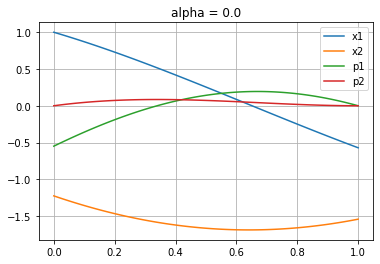

alpha = 0.01
fedorenko_norm = 2.6132060307090624e-16
x1(0) =  1.0
x2(0) =  -1.225967668
p1(0) =  -0.549411673
p2(0) =  0.0
Value =  0.27470589


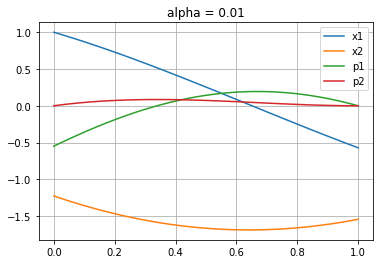

alpha = 0.5
fedorenko_norm = 9.002616393102347e-16
x1(0) =  1.0
x2(0) =  -1.241608827
p1(0) =  -0.543301504
p2(0) =  0.0
Value =  0.271650811


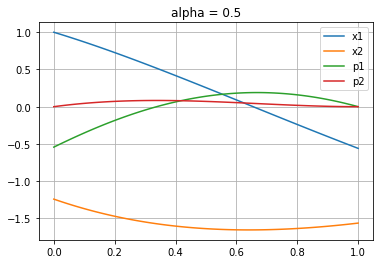

alpha = 1
fedorenko_norm = 1.7275629517631039e-16
x1(0) =  1.0
x2(0) =  -1.257385686
p1(0) =  -0.537928989
p2(0) =  0.0
Value =  0.268964556


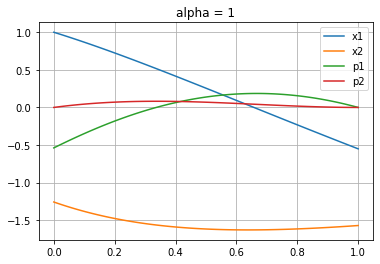

alpha = 5
fedorenko_norm = 2.8904428208478e-16
x1(0) =  1.0
x2(0) =  -1.349870532
p1(0) =  -0.514893756
p2(0) =  0.0
Value =  0.257446938


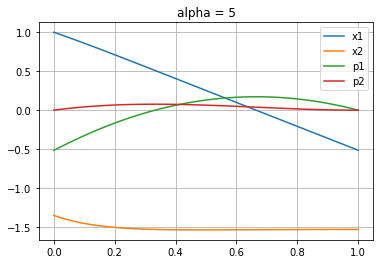

alpha = 10
fedorenko_norm = 8.207805544866288e-17
x1(0) =  1.0
x2(0) =  -1.404841457
p1(0) =  -0.505986228
p2(0) =  0.0
Value =  0.252993172


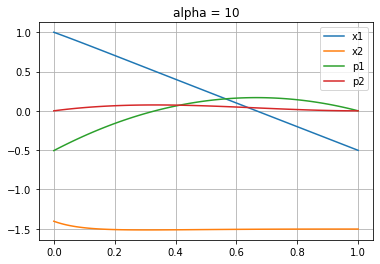

In [7]:
eps = 1e-10
a1 = 0
a2 = 0

# main(0, a1, a2, eps)

for alpha in [0.0,0.01,0.5,1,5,10]:
    main(alpha, a1, a2, eps)